# <font color=#003d5c>I. Aprendizaje Supervisado</font>

## <font color=#003d5c>Algoritmos de Clasificación</font>

Clasificación es el proceso que consiste en predecir, a partir de un determinado conjunto de datos, la pertenencia a una clase o categoría. Las clases a menudo son llamadas `Target, Etiquetas o Categorías`. El modelado predictivo de clasificación es la tarea de aproximar una función de mapeo $f$ que asocia un conjunto de variables de entradas $X$ a un variable discreta de salida $y$.

<img src="images/classification.png" width="600">

Por ejemplo, la detección de churners dentro de una base de clientes de una empresa Telco puede considerarse como un problema de clasificación. Esta es una clasificación binaria ya que sólo existen 2 clases o categorías tales como `churner` o `no churner`. Un clasificador utiliza algunos datos de entrenamiento para poder comprender cómo las variables de entrada dadas se relacionan con la clase.

En este caso, los clientes que fueron `churners` en meses anteriores y sus variables de comportamiento de consumo, pagos y reclamos se deben usar como datos de entrenamiento. Con el uso de esos datos, podemos construir un clasificador que, una vez que esté entrenado con una alta precisión, se pueda utilizar para detectar `churners` en el futuro, y así poder aplicarles campañas de retención.

**Clasificación** pertenece a la categoría de aprendizaje supervisado donde contamos con el Target además de los datos de entrada. Asimismo, existen muchas aplicaciones de clasificación en muchos dominios de negocio, tal como en la aprobación de crédito, diagnóstico médico, marketing, etc.

Por otro lado, existen 2 tipos de algoritmos de clasificación: `Lazy Learners` y `Eager Learners`.

- **Lazy Learners**

Simplemente almacenan los datos de entrenamiento y sólo se utilizan en la fase de predicción de los datos de prueba. La clasificación se realiza en base a los datos más relacionados del dataset de entrenamiento. A diferencia de los `Eager Learners`, los `Lazy Learners` tienen un tiempo de entrenamiento muy corto, pero tardan más tiempo en la predicción.

Por ejempo: `K-nearest neighbor`, `Case-based reasoning`

<img src="images/lazy_learner.jpeg" width="400">

- **Eager Learners**

Construyen un modelo de clasificación basado en los datos de entrenamiento. Debido a la construcción del modelo, los `Eager Learners` tardan mucho tiempo en entrenar, y menos tiempo en la predicción.

Por ejemplo: `Árbol de Decisión`, `Random Forest`, `XGBoost`, `Naive Bayes`, `SVM`, `Redes Neuronales`

En este notebook revisaremos un algoritmo del tipo `Lazy`: **K-Nearest Neighbor**

# <font color=#003d5c>Vecinos más cercanos (KNN)</font>

Cuando se requiere una predicción para una instancia de datos no vistos, el algoritmo KNN buscará en el conjunto de datos de entrenamiento las k instancias más similares. El atributo de predicción de las instancias más similares se resume y se devuelve como la predicción para la instancia no vista.

La medida de similitud depende del tipo de datos. Para datos de valor real, se puede usar la **distancia euclidiana**. Se pueden usar otros tipos de datos, como los datos categóricos o binarios, donde la medida puede ser la **distancia de Hamming**.

En el caso de problemas de regresión, se puede devolver el **promedio del atributo predicho**; en el caso de la clasificación, **la clase más prevalente (moda)**.

<img src="images/knn.jpeg" width="400">


## <font color=#003d5c>Cómo trabaja k-Nearest Neighbors</font>

Es un algoritmo de aprendizaje competitivo, porque internamente utiliza la competencia entre los elementos del modelo (instancias de datos) para tomar una decisión predictiva. La medida de similitud objetivo entre las instancias de datos hace que cada instancia de datos compita para "ganar" o sea la más similar a una instancia de datos no vista dada y contribuya a una predicción.

<img src="images/knn.png" width="400">

El aprendizaje lento se refiere al hecho de que el algoritmo no crea un modelo hasta el momento en que se requiere una predicción. Es flojo porque solo funciona en el último segundo. Esto tiene el beneficio de incluir solo datos relevantes para los datos no vistos. Una desventaja es que puede ser **computacionalmente costoso repetir búsquedas iguales o similares en conjuntos de datos de entrenamiento más grandes**.

Finalmente, `KNN` es poderoso porque no asume nada sobre los datos, salvo que una medida de distancia se puede calcular de manera consistente entre dos instancias. Como tal, se llama `no paramétrico o no lineal` ya que no asume una forma funcional.

## <font color=#003d5c>Ejemplo:</font>

Importar y configurar la librería de gráfica **matplotlib**

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14
%matplotlib inline

## <font color=#003d5c>Creando un clasificador KNN</font>

<img src="images/cheering_minions.gif" width="400">

### <font color=#003d5c>1. Estime la similitud</font>

Para hacer predicciones necesitamos calcular la similitud entre dos instancias de datos dadas. Esto es necesario para que podamos ubicar las k instancias de datos más similares en el conjunto de datos de entrenamiento para un miembro dado del conjunto de datos de prueba y, a su vez, hacer una predicción.

Para variables numéricas podemos usar directamente la medida de distancia euclidiana. **Esto se define como la raíz cuadrada de la suma de las diferencias cuadradas entre las dos matrices de números**.

Además, queremos controlar qué campos incluir en el cálculo de distancia. Específicamente, solo queremos incluir los variables numéricas.

En base a lo mencionado, podemos definir la función `distanciaEuclidiana` de la siguiente manera:

$$d(p,q)=\sum_{i=0}^{n-1} \sqrt{(p_{i}-q_{i})^{2}}$$

In [2]:
import numpy as np
def distanciaEuclidiana(instancia1, instancia2):
    distancia = (instancia1 - instancia2) ** 2
    
    if distancia.shape[0] == distancia.size:
        return distancia.sum() ** 0.5
    else:
        return distancia.sum(axis=1) ** 0.5

¿Exactamente, qué es lo que hará la función definida?

Por ejemplo, si tenemos 2 arreglos de 1 dimensión:

In [3]:
instancia1 = np.array([2, 2])
instancia2 = np.array([4, 4])

Calculemos la diferencia de elemento a elemento, y las elevamos al cuadrado

In [4]:
distancia = (instancia1 - instancia2) ** 2
distancia

array([4, 4], dtype=int32)

Si es unidimensional, calcula la suma de todos las diferencias calculadas y les aplica la raíz cuadrada. ¿Pero cómo sabemos que es unidemensional? Una forma es verificando si el número de elementos en la dimensión x es igual al número de elementos en total. 

In [5]:
print("Numero de elementos en la dimensión x: {0}".format(distancia.shape[0]))
print("Numero de elementos en total: {0}".format(distancia.size))

Numero de elementos en la dimensión x: 2
Numero de elementos en total: 2


In [6]:
distancia.sum()

8

¿Y si trabajamos con matrices?

In [7]:
instancia1 = np.array([[2, 2], [3, 5], [9, 10]])
instancia2 = np.array([[4, 4], [7, 8], [5, 2]])

Calculemos la diferencia de elemento a elemento, y las elevamos al cuadrado

In [8]:
distancia = (instancia1 - instancia2) ** 2
distancia

array([[ 4,  4],
       [16,  9],
       [16, 64]], dtype=int32)

En este caso como es bidimensional, calcula la suma de todos las diferencias calculadas a nivel de registro y les aplica la raíz cuadrada. ¿Pero cómo sabemos que es unidemensional? Una forma es verificando si el número de elementos en la dimensión x es igual al número de elementos en total.

In [9]:
print("Numero de elementos en la dimensión x: {0}".format(distancia.shape[0]))
print("Numero de elementos en total: {0}".format(distancia.size))

Numero de elementos en la dimensión x: 3
Numero de elementos en total: 6


In [10]:
distancia.sum(axis=1)

array([ 8, 25, 80], dtype=int32)

Una vez entendido esto, usemos la función.

In [11]:
data1 = np.array([2, 2])
data2 = np.array([4, 4])
distancia = distanciaEuclidiana(data1, data2)
print('Distancia: ', distancia)

Distancia:  2.82842712475


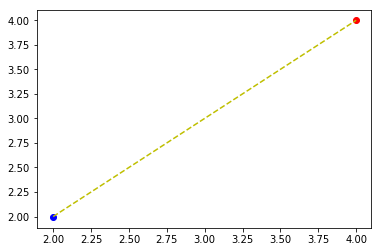

In [12]:
plt.scatter(data1[0], data1[1], c='b')
plt.scatter(data2[0], data2[1], c='r')
plt.plot([data1[0], data2[0]], [data1[1], data2[1]], '--y')

### <font color=#003d5c>2. Encontrar vecinos</font>

Ahora que tenemos una medida de similitud, podemos usarla para recopilar las k instancias más similares para una determinada instancia no vista. Este es un proceso directo de calcular la distancia para todas las instancias y seleccionar un subconjunto con los valores de distancia más pequeños.

A continuación se muestra la función `obtenerVecinos` que devuelve los k vecinos más similares del conjunto de entrenamiento para una instancia de prueba determinada (utilizando la función `DistanciaEuclidiana` ya definida)

Para ello, definamos los conjuntos de entrenamiento y test:

In [13]:
conjuntoEntrenamiento = np.array([[2, 2], [4, 4], [7, 7], [4, 1], [3, 4], [5, 2]])
conjuntoTest = np.array([5, 5])

Y ahora, calculemos la distancia:

In [14]:
dist = distanciaEuclidiana(conjuntoEntrenamiento, conjuntoTest)
dist

array([ 4.24264069,  1.41421356,  2.82842712,  4.12310563,  2.23606798,  3.        ])

¿Cuáles son los dos puntos más cercanos?

In [15]:
print("Arreglo de distancias: {}".format(dist))
print("Arreglo de distancias ordenado: {}".format(np.sort(dist)))

Arreglo de distancias: [ 4.24264069  1.41421356  2.82842712  4.12310563  2.23606798  3.        ]
Arreglo de distancias ordenado: [ 1.41421356  2.23606798  2.82842712  3.          4.12310563  4.24264069]


El método `argsort()` retorna los índices del arreglo ordenado.

In [16]:
dist.argsort()[:2]

array([1, 4], dtype=int64)

Dado que los índices del arreglo de distancias hacen referencia a los índices de los registros del conjunto de entrenamiento.

In [17]:
dist[dist.argsort()[:2]]

array([ 1.41421356,  2.23606798])

In [18]:
conjuntoEntrenamiento[dist.argsort()[:2]]

array([[4, 4],
       [3, 4]])

In [19]:
def obtenerVecinos(conjuntoEntrenamiento, conjuntoTest, k):
    dist = distanciaEuclidiana(conjuntoEntrenamiento, conjuntoTest)
    vecinos = dist.argsort()[:k]
    return vecinos

In [20]:
k = 3
vecinos = obtenerVecinos(conjuntoEntrenamiento, conjuntoTest, k)
print(vecinos)

[1 4 2]


Grafiquemos el vecino más cercano al registro de prueba.

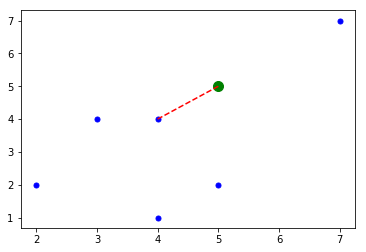

In [21]:
plt.scatter(conjuntoEntrenamiento[:, 0], conjuntoEntrenamiento[:, 1], s=25, c='b')
plt.scatter(conjuntoTest[0], conjuntoTest[1], c='g', s=100)
plt.plot([conjuntoTest[0], conjuntoEntrenamiento[vecinos[0], 0]], [conjuntoTest[1], conjuntoEntrenamiento[vecinos[0], 1]], '--r')

Probar con otra instancia de prueba

In [22]:
instanciaPrueba = np.array([3.4, 3])
k = 3
vecinos = obtenerVecinos(conjuntoEntrenamiento, instanciaPrueba, k)
print(vecinos)

[4 1 0]


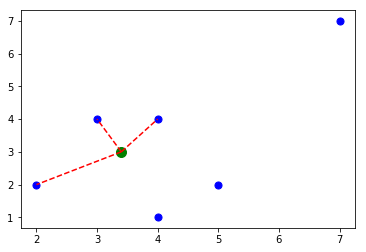

In [23]:
plt.scatter(conjuntoEntrenamiento[:, 0], conjuntoEntrenamiento[:, 1], s=50, c='b')
plt.scatter(instanciaPrueba[0], instanciaPrueba[1], c='g', s=100)
for vecino in vecinos:
    plt.plot([instanciaPrueba[0], conjuntoEntrenamiento[vecino, 0]], [instanciaPrueba[1], conjuntoEntrenamiento[vecino, 1]], '--r')

### <font color=#003d5c>3. Respuesta</font>

Una vez que hemos localizado a los vecinos más similares para una instancia de prueba, la siguiente tarea es diseñar una respuesta pronosticada basada en esos vecinos.

Podemos hacer esto al permitir que cada vecino vote por su atributo de clase, y tomar el voto de la mayoría como la predicción.

Primero vamos a definir la etiqueta de cada instancia.

In [24]:
conjuntoEntrenamiento_y = np.array([0, 0, 1, 0, 1, 1])

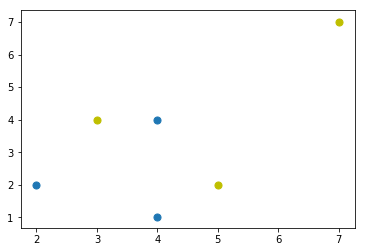

In [25]:
plt.scatter(conjuntoEntrenamiento[conjuntoEntrenamiento_y==0, 0], conjuntoEntrenamiento[conjuntoEntrenamiento_y==0, 1], s=50)
plt.scatter(conjuntoEntrenamiento[conjuntoEntrenamiento_y==1, 0], conjuntoEntrenamiento[conjuntoEntrenamiento_y==1, 1], c='y', s=50)

A continuación se proporciona una función para obtener la mayoría de las respuestas votadas de un número de vecinos. Asume que la clase es el último atributo para cada vecino.

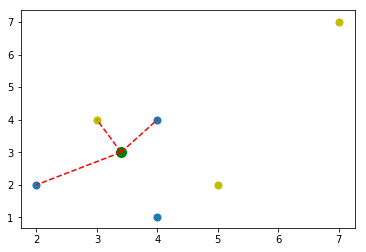

In [26]:
plt.scatter(conjuntoEntrenamiento[conjuntoEntrenamiento_y==0, 0], conjuntoEntrenamiento[conjuntoEntrenamiento_y==0, 1], s=50)
plt.scatter(conjuntoEntrenamiento[conjuntoEntrenamiento_y==1, 0], conjuntoEntrenamiento[conjuntoEntrenamiento_y==1, 1], c='y', s=50)
plt.scatter(instanciaPrueba[0], instanciaPrueba[1], c='g', s=100)
for vecino in vecinos:
    plt.plot([instanciaPrueba[0], conjuntoEntrenamiento[vecino, 0]], [instanciaPrueba[1], conjuntoEntrenamiento[vecino, 1]], '--r')

In [27]:
conjuntoEntrenamiento_y[vecinos]

array([1, 0, 0])

Contar las instancias por clase

In [28]:
from scipy.stats import itemfreq
freq = itemfreq(conjuntoEntrenamiento_y[vecinos])
freq

array([[0, 2],
       [1, 1]], dtype=int64)

In [29]:
freq[:, 1].argmax()

0

La clase ganadora es:

In [30]:
freq[:, 0][freq[:, 1].argmax()]

0

### <font color=#003d5c>4. Probabilidad Estimada</font>

Del mismo modo, la probabilidad se puede estimar como el porcentaje de votos del vecino para cada clase

In [31]:
freq[:, 1] / freq[:, 1].sum()

array([ 0.66666667,  0.33333333])

El método `np.vstack` permite concatenar los arreglos en a nivel de un eje.

In [32]:
np.vstack((freq[:, 0], freq[:, 1] / freq[:, 1].sum())).T

array([[ 0.        ,  0.66666667],
       [ 1.        ,  0.33333333]])

### <font color=#003d5c>5. Creando la respuesta</font>

In [33]:
def obtenerRespuesta(conjuntoEntrenamiento_y, vecinos):
    votes = conjuntoEntrenamiento_y[vecinos]
    freq = itemfreq(votes)
    return freq[:, 0][freq[:, 1].argmax()], np.vstack((freq[:, 0], freq[:, 1] / freq[:, 1].sum())).T

Podemos probar esta función con algunos vecinos de prueba, de la siguiente manera:

In [34]:
respuesta = obtenerRespuesta(conjuntoEntrenamiento_y, vecinos)
print(respuesta)

(0, array([[ 0.        ,  0.66666667],
       [ 1.        ,  0.33333333]]))


### <font color=#003d5c>6. Clasificador</font>

Ahora podemos integrar todas las funciones definidas en una sola función.

In [35]:
def knn_clasificador_de_una_instancia(conjuntoEntrenamiento, conjuntoEntrenamiento_y, instanciaPrueba, k):
    vecinos = obtenerVecinos(conjuntoEntrenamiento, instanciaPrueba, k)
    pred_y, pred_prob = obtenerRespuesta(conjuntoEntrenamiento_y, vecinos)
    return pred_y, pred_prob, vecinos

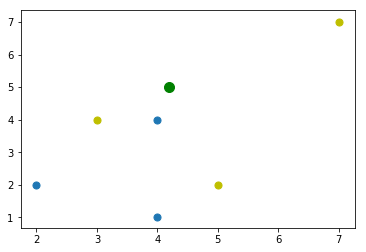

In [36]:
instanciaPrueba = np.array([4.2, 5])
plt.scatter(conjuntoEntrenamiento[conjuntoEntrenamiento_y==0, 0], conjuntoEntrenamiento[conjuntoEntrenamiento_y==0, 1], s=50)
plt.scatter(conjuntoEntrenamiento[conjuntoEntrenamiento_y==1, 0], conjuntoEntrenamiento[conjuntoEntrenamiento_y==1, 1], c='y', s=50)
plt.scatter(instanciaPrueba[0], instanciaPrueba[1], c='green', s=100)

In [37]:
vecinos = obtenerVecinos(conjuntoEntrenamiento, instanciaPrueba, 2)
pred_y, pred_prob = obtenerRespuesta(conjuntoEntrenamiento_y, vecinos)
pred_y, pred_prob

(0, array([[ 0. ,  0.5],
        [ 1. ,  0.5]]))

k =  2
pred_y =  0
pred_prob =  [[ 0.   0.5]
 [ 1.   0.5]]


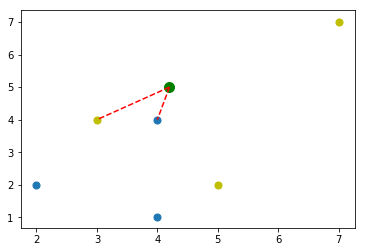

k =  3
pred_y =  1
pred_prob =  [[ 0.          0.33333333]
 [ 1.          0.66666667]]


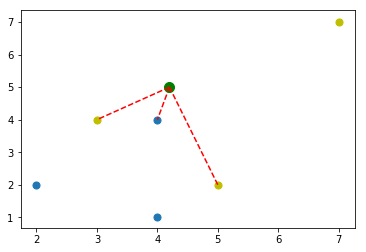

k =  4
pred_y =  1
pred_prob =  [[ 0.    0.25]
 [ 1.    0.75]]


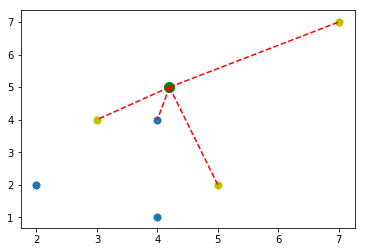

k =  5
pred_y =  1
pred_prob =  [[ 0.   0.4]
 [ 1.   0.6]]


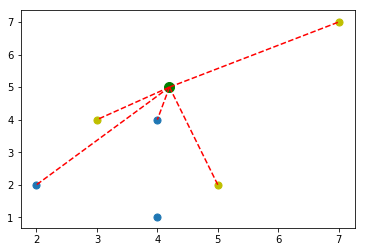

In [38]:
for k in range(2, 6):
    print('k = ', k)
    pred_y, pred_prob, vecinos = knn_clasificador_de_una_instancia(conjuntoEntrenamiento, conjuntoEntrenamiento_y, instanciaPrueba, k)
    print('pred_y = ', pred_y)
    print('pred_prob = ', pred_prob)
    plt.scatter(conjuntoEntrenamiento[conjuntoEntrenamiento_y==0, 0], conjuntoEntrenamiento[conjuntoEntrenamiento_y==0, 1], s=50)
    plt.scatter(conjuntoEntrenamiento[conjuntoEntrenamiento_y==1, 0], conjuntoEntrenamiento[conjuntoEntrenamiento_y==1, 1], c='y', s=50)
    plt.scatter(instanciaPrueba[0], instanciaPrueba[1], c='green', s=100)
    for vecino in vecinos:
        plt.plot([instanciaPrueba[0], conjuntoEntrenamiento[vecino, 0]], [instanciaPrueba[1], conjuntoEntrenamiento[vecino, 1]], '--r')
    plt.show()

#### <font color=#003d5c>6.1. Permitir más de una instancia</font>

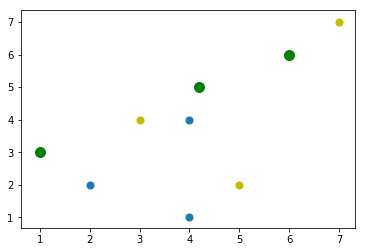

In [39]:
instanciasPrueba = np.array([[4.2, 5], [1, 3], [6, 6]])
plt.scatter(conjuntoEntrenamiento[conjuntoEntrenamiento_y==0, 0], conjuntoEntrenamiento[conjuntoEntrenamiento_y==0, 1], s=50)
plt.scatter(conjuntoEntrenamiento[conjuntoEntrenamiento_y==1, 0], conjuntoEntrenamiento[conjuntoEntrenamiento_y==1, 1], c='y', s=50)
plt.scatter(instanciasPrueba[:,0], instanciasPrueba[:,1], c='green', s=100)

In [40]:
def knn_clasificador(conjuntoEntrenamiento, conjuntoEntrenamiento_y, instanciasPrueba, k):
    n_instancias_prueba = instanciasPrueba.shape[0]
    pred_y = np.zeros(n_instancias_prueba)
    y_unico = np.unique(conjuntoEntrenamiento_y)
    pred_prob = np.zeros((n_instancias_prueba, y_unico.shape[0]))
    for i in range(n_instancias_prueba):
        vecinos = obtenerVecinos(conjuntoEntrenamiento, instanciasPrueba[i], k)
        pred_y_, pred_prob_ = obtenerRespuesta(conjuntoEntrenamiento_y, vecinos)
        pred_y[i] = pred_y_
        
        # pred_y podría no incluir todos los valores de "y"
        for j in range(y_unico.shape[0]):
            pred_prob[i, j] =  pred_prob_[pred_prob_[:,0] == y_unico[j], 1].sum()
            
    return pred_y, pred_prob

In [41]:
k = 3
knn_clasificador(conjuntoEntrenamiento, conjuntoEntrenamiento_y, instanciasPrueba, k)

(array([ 1.,  0.,  1.]), array([[ 0.33333333,  0.66666667],
        [ 0.66666667,  0.33333333],
        [ 0.33333333,  0.66666667]]))

**TAREA:**

Aplicar lo mismo, pero con el método de distancia Manhattan.

$$d(p,q)=\sum_{i=0}^{n-1} |p_{i}-q_{i}|$$

y, reponder la siguiente pregunta ¿qué tanto cambian las predicciones?

En la siguiente clase veremos la sesión de Tunning, y responderemos las dudas que puedan tener al respecto.

## <font color=#003d5c>Aplicar al Dataset De Hipotecario</font>

In [42]:
import pandas as pd

In [43]:
df = pd.read_csv('Data/DS_Credito Hipotecario.csv')

In [44]:
df.head()

,ID,SEXO,FLAG_CASADO,NRO_DEPENDIENTES,EDUCACION,FLAG_TRAB_INDEP,INGRESOS_SOLICITANTE,INGRESOS_COSOLICITANTE,MONTO_PRESTAMO_MILES,PLAZO_PRESTAMO_MESES,FLAG_HISTORIAL_CREDITICIO,TIPO_ZONA,FLAG_CRED_HIPO
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,Bueno,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Bueno,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Bueno,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Bueno,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Bueno,Urban,Y


Transformemos la variable target a un valor entero

In [45]:
df['FLAG_CRED_HIPO'] = df['FLAG_CRED_HIPO'].map({'N':0, 'Y':1})

In [46]:
df['SEXO'].fillna(df['SEXO'].mode()[0], inplace=True)
df['FLAG_CASADO'].fillna(df['FLAG_CASADO'].mode()[0], inplace=True)
df['NRO_DEPENDIENTES'].fillna(df['NRO_DEPENDIENTES'].mode()[0], inplace=True)
df['FLAG_TRAB_INDEP'].fillna(df['FLAG_TRAB_INDEP'].mode()[0], inplace=True)
df['INGRESOS_COSOLICITANTE'].fillna(df['INGRESOS_COSOLICITANTE'].mean(), inplace=True)
df['MONTO_PRESTAMO_MILES'].fillna(df['MONTO_PRESTAMO_MILES'].mean(), inplace=True)
df['PLAZO_PRESTAMO_MESES'].fillna(df['PLAZO_PRESTAMO_MESES'].mean(), inplace=True)
df['FLAG_HISTORIAL_CREDITICIO'].fillna(df['FLAG_HISTORIAL_CREDITICIO'].mode()[0], inplace=True)

In [47]:
df['SEXO'] = df['SEXO'].map({'Male': 0, 'Female': 1})
df['FLAG_CASADO'] = df['FLAG_CASADO'].map({'No': 0, 'Yes': 1})
df['EDUCACION'] = df['EDUCACION'].map({'Not Graduate': 0, 'Graduate': 1})
df['FLAG_TRAB_INDEP'] = df['FLAG_TRAB_INDEP'].map({'No': 0, 'Yes': 1})
df['FLAG_HISTORIAL_CREDITICIO'] = df['FLAG_HISTORIAL_CREDITICIO'].map({'Malo': 0, 'Bueno': 1})
df = pd.concat([df, pd.get_dummies(df['TIPO_ZONA'], prefix = 'TIPO_ZONA', drop_first = True)], axis=1)
df = pd.concat([df, pd.get_dummies(df['NRO_DEPENDIENTES'], prefix = 'NRO_DEPENDIENTES', drop_first = True)], axis=1)
del df['TIPO_ZONA']
del df['NRO_DEPENDIENTES']

In [48]:
df.head()

,ID,SEXO,FLAG_CASADO,EDUCACION,FLAG_TRAB_INDEP,INGRESOS_SOLICITANTE,INGRESOS_COSOLICITANTE,MONTO_PRESTAMO_MILES,PLAZO_PRESTAMO_MESES,FLAG_HISTORIAL_CREDITICIO,FLAG_CRED_HIPO,TIPO_ZONA_Semiurban,TIPO_ZONA_Urban,NRO_DEPENDIENTES_1,NRO_DEPENDIENTES_2,NRO_DEPENDIENTES_3+
0,LP001002,0,0,1,0,5849,0.0,146.412162,360.0,1,1,0,1,0,0,0
1,LP001003,0,1,1,0,4583,1508.0,128.000000,360.0,1,0,0,0,1,0,0
2,LP001005,0,1,1,1,3000,0.0,66.000000,360.0,1,1,0,1,0,0,0
3,LP001006,0,1,0,0,2583,2358.0,120.000000,360.0,1,1,0,1,0,0,0
4,LP001008,0,0,1,0,6000,0.0,141.000000,360.0,1,1,0,1,0,0,0


In [49]:
df.columns

Index(['ID', 'SEXO', 'FLAG_CASADO', 'EDUCACION', 'FLAG_TRAB_INDEP',
       'INGRESOS_SOLICITANTE', 'INGRESOS_COSOLICITANTE',
       'MONTO_PRESTAMO_MILES', 'PLAZO_PRESTAMO_MESES',
       'FLAG_HISTORIAL_CREDITICIO', 'FLAG_CRED_HIPO', 'TIPO_ZONA_Semiurban',
       'TIPO_ZONA_Urban', 'NRO_DEPENDIENTES_1', 'NRO_DEPENDIENTES_2',
       'NRO_DEPENDIENTES_3+'],
      dtype='object')

In [50]:
y = df.FLAG_CRED_HIPO
X = df[['SEXO', 'FLAG_CASADO', 'EDUCACION', 'FLAG_TRAB_INDEP', 'INGRESOS_SOLICITANTE', 'INGRESOS_COSOLICITANTE',
        'MONTO_PRESTAMO_MILES', 'PLAZO_PRESTAMO_MESES',
        'FLAG_HISTORIAL_CREDITICIO', 'TIPO_ZONA_Semiurban',
        'TIPO_ZONA_Urban', 'NRO_DEPENDIENTES_1', 'NRO_DEPENDIENTES_2',
        'NRO_DEPENDIENTES_3+']]

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.33, random_state=123)

#### <font color=#003d5c>Normalización: </font>

Por lo general, es mejor normalizar los atributos antes para calcular la distancia. La razón es que puede haber atributos que están en rangos con grandes scalas inicialmente (por ejemplo: el ingreso o salario) y que puedan pesar sobre los atributos con rangos inicialmente más pequeños (por ejemplo: atributos binarios como flag_casado o flag_educacion). La normalización de atributos aborda este problema.

Por ejemplo: Normalización Min-Max

$${v}^{´}=\frac{v-Min}{Max-Min}$$

In [52]:
from sklearn import preprocessing

In [53]:
min_max_scaler = preprocessing.MinMaxScaler()

In [54]:
min_max_scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [55]:
X_train_minmax = min_max_scaler.transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

In [56]:
pd.DataFrame(X_train_minmax, columns=X.columns)#.describe()

,SEXO,FLAG_CASADO,EDUCACION,FLAG_TRAB_INDEP,INGRESOS_SOLICITANTE,INGRESOS_COSOLICITANTE,MONTO_PRESTAMO_MILES,PLAZO_PRESTAMO_MESES,FLAG_HISTORIAL_CREDITICIO,TIPO_ZONA_Semiurban,TIPO_ZONA_Urban,NRO_DEPENDIENTES_1,NRO_DEPENDIENTES_2,NRO_DEPENDIENTES_3+
0,0.0,0.0,1.0,1.0,0.086790,0.000000,0.185647,0.743590,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.044527,0.000000,0.166927,0.743590,1.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.040421,0.000000,0.184087,0.743590,1.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.032616,0.056654,0.213729,0.743590,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.058046,0.112480,0.221529,0.743590,1.0,1.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.026704,0.037090,0.180967,0.743590,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,1.0,1.0,1.0,0.041014,0.035760,0.188768,0.743590,1.0,0.0,0.0,1.0,0.0,0.0
7,0.0,1.0,1.0,0.0,0.027829,0.053199,0.102964,0.743590,1.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.049672,0.000000,0.138846,0.743590,0.0,1.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.020408,0.035848,0.059282,0.743590,1.0,0.0,1.0,0.0,0.0,0.0


In [57]:
y_pred, y_pred_prob = knn_clasificador(X_train_minmax, y_train, X_test_minmax, k=10)

In [58]:
y_pred_prob[:5]

array([[ 0.4,  0.6],
       [ 0.2,  0.8],
       [ 0.4,  0.6],
       [ 0.2,  0.8],
       [ 0.7,  0.3]])

### <font color=#003d5c>Evaluación del KNN</font>

Existen diferentes métricas de evaluación, que vamos a ver a detalle al final del módulo 5. Pero adelantándonos un poco, evaluaremos al KNN utilizando las métricas de accuracy y auc.

#### <font color=#003d5c>Matriz de Confusión</font>

Es una matriz que nos permite evaluar e interpretar la efectividad de nuestro clasificador.

<img src="images/confusion_matrix.png" width="400">

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 20,  52],
       [  4, 127]], dtype=int64)

In [60]:
pd.DataFrame(y_test)[0].value_counts()

1    131
0     72
Name: 0, dtype: int64

¿El resultado no es muy intuitivo verdad? Pues usemos la siguiente función que nos da como ejemplo el módulo [Scikit-learn](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)

In [61]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusión',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Clase Verdadera')
    plt.xlabel('Clase Predicha')

In [62]:
classes = ["NO", "SI"]

Confusion matrix, without normalization
[[ 20  52]
 [  4 127]]


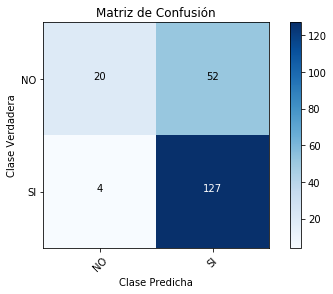

In [63]:
plot_confusion_matrix(cm, classes)

#### <font color=#003d5c>Accuracy</font>

Es una medida para evaluar modelos de clasificación. Informalmente, `accuracy` es la fracción de predicciones que nuestro modelo acertó. Formalmente, tiene la siguiente definición:

$$\text{Accuracy} = \frac{\text{Número de predicciones correctas}}{\text{Total de predicciones}}$$

Usando la matriz de confusión:

$$\text{Accuracy} = \frac{TP+TN}{TP+TN+FP+FN}$$

In [64]:
# acccuracy = (TP + TN) / Total
accuracy = (127 + 20) / (127 + 20 + 52 + 4)

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(y_test, y_pred)

0.72413793103448276

## Usando Sklearn

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn = KNeighborsClassifier(n_neighbors=10)

In [69]:
knn.fit(X_train_minmax, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [70]:
y_pred = knn.predict(X_test_minmax)
y_pred_prob = knn.predict_proba(X_test_minmax)

In [71]:
y_pred_prob[:5]

array([[ 0.4,  0.6],
       [ 0.2,  0.8],
       [ 0.4,  0.6],
       [ 0.2,  0.8],
       [ 0.7,  0.3]])

Confusion matrix, without normalization
[[ 20  52]
 [  4 127]]


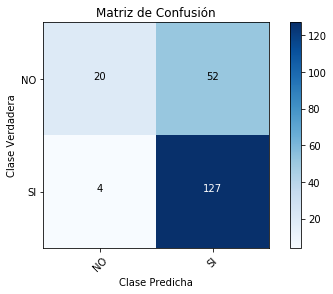

In [72]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes)

In [73]:
accuracy_score(y_test, y_pred)

0.72413793103448276

### ¿Cuál es el `K` que debo elegir?

In [74]:
d = {}
for n_ in range(3, 30):
    knn = KNeighborsClassifier(n_neighbors=n_)
    knn.fit(X_train_minmax, y_train)
    y_pred = knn.predict(X_test_minmax)
    y_pred_prob = knn.predict_proba(X_test_minmax)
    d[n_] = accuracy_score(y_test, y_pred)
    print("Accuracy del KNN con {0} vecinos: {1}".format(n_, d[n_]))

Accuracy del KNN con 3 vecinos: 0.6945812807881774
Accuracy del KNN con 4 vecinos: 0.7044334975369458
Accuracy del KNN con 5 vecinos: 0.7192118226600985
Accuracy del KNN con 6 vecinos: 0.729064039408867
Accuracy del KNN con 7 vecinos: 0.6945812807881774
Accuracy del KNN con 8 vecinos: 0.7142857142857143
Accuracy del KNN con 9 vecinos: 0.7093596059113301
Accuracy del KNN con 10 vecinos: 0.7241379310344828
Accuracy del KNN con 11 vecinos: 0.7142857142857143
Accuracy del KNN con 12 vecinos: 0.7142857142857143
Accuracy del KNN con 13 vecinos: 0.7093596059113301
Accuracy del KNN con 14 vecinos: 0.7142857142857143
Accuracy del KNN con 15 vecinos: 0.7142857142857143
Accuracy del KNN con 16 vecinos: 0.7142857142857143
Accuracy del KNN con 17 vecinos: 0.7093596059113301
Accuracy del KNN con 18 vecinos: 0.7044334975369458
Accuracy del KNN con 19 vecinos: 0.7093596059113301
Accuracy del KNN con 20 vecinos: 0.7044334975369458
Accuracy del KNN con 21 vecinos: 0.6847290640394089
Accuracy del KNN con

In [75]:
import operator
max(d.items(), key=operator.itemgetter(1))[0]

6

## Comparando KNN con otros modelos

**Ventajas de KNN: **

- Simple de entender y explicar
- El entrenamiento del modelo es rápido
-  Puede usarse para clasificación y regresión

<img src="images/excellent.gif" width="300">

**Desventajas de KNN:**

- Debe almacenar todos los datos de entrenamiento
- La fase de predicción puede ser lenta cuando n es grande
- Sensible a las características irrelevantes
- Sensible a la escala de los datos
- La precisión (generalmente) no es competitiva con los mejores métodos de aprendizaje supervisado

**Referencias:**
- https://towardsdatascience.com/machine-learning-classifiers-a5cc4e1b0623
- http://nbviewer.jupyter.org/github/albahnsen/PracticalMachineLearningClass/blob/master/notebooks/10-KNN.ipynb
- https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
- https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
- http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py